In [1]:
import random  # For random sampling.
import networkx as nx  # For the graphs.
import numpy as np  # For vector operations.
import matplotlib.pyplot as plt  # For plotting.
from tqdm.notebook import tqdm  # Single function for displaying progress bar.

In [2]:
def barabasi_albert_with_state(n, m, seed=None):
    """Create a Barabasi-Albert graph and add 'state' property to each of its nodes."""
    graph = nx.barabasi_albert_graph(n, m, seed)
    for *_, data in graph.nodes.data():
        data.update({'state': True})
    return graph

In [3]:
def complete_with_state(n):
    """Create a complete graph and add 'state' property to each of its nodes."""
    graph = nx.complete_graph(n)
    for *_, data in graph.nodes.data():
        data.update({'state': True})
    return graph

In [18]:
def update(graph, q=4, p=0.5, f=0.5):
    """Run a single iteration of the simulation. Given `graph` return a new graph with 
    the state updated appropriately.
    """
    prev_graph = graph  # Only for reading data.
    next_graph = prev_graph.copy()  # Actually being updated.
    for (prev_node, prev_data), (next_node, next_data) in zip(prev_graph.nodes.data(), next_graph.nodes.data()):
        if random.random() < 1 - p:
            # Conformity
            neighbours_state = [prev_graph.nodes[n]['state'] for n in nx.neighbors(prev_graph, prev_node)]
            if len(neighbours_state) >= q:
                chosen_neigbours = random.sample(neighbours_state, q)
                if len(set(chosen_neigbours)) == 1:  # If all states are the same.
                    next_data.update({'state': chosen_neigbours[0]})  # It doesn't matter which one.
            elif len(neighbours_state) >= 1:
                chosen_neigbours = neighbours_state
                if len(set(chosen_neigbours)) == 1:
                    next_data.update({'state': chosen_neigbours[0]})
        else:
            # Independence
            if random.random() > f:
                next_data.update({'state': not prev_data['state']})
    return next_graph

In [11]:
def true_fraction(graph):
    """For given `graph` return the fraction of true nodes."""
    return len([node for node, data in graph.nodes.data() if data['state']]) / len(graph)

In [12]:
def draw_colored(graph):
    """Draw `graph` with nodes coloured appropriately, i.e. green for true nodes, red
    for false ones.
    """
    colors = ['green' if data['state'] else 'red' for node, data in graph.nodes.data()]
    nx.draw(graph, node_color=colors)

In [20]:
def simulation(n, q=4, f=0.5, n_mc=100, n_iterations=10):
    """Run the simulation on complete graph, where each graph is updated `n_iterations`
    times and the results are averaged using Monte Carlo method with `n_mc` iterations.
    """
    ps = np.linspace(0, 1, 20)
    results = []
    for p in tqdm(ps):
        partial_results = []
        for i in range(n_mc):
            graph = complete_with_state(n)
            for _ in range(n_iterations):
                graph = update(graph, q, p, f)
            partial_results.append(true_fraction(graph))
        partial_results = np.array(partial_results)  # Cast to numpy array.
        results.append(partial_results.mean())
    return np.array(results)

Simulation for connected graph:

In [35]:
f_results = {
    0.2: [], 
    0.3: [], 
    0.4: [], 
    0.5: []
}

for f in f_results.keys():
    f_results[f] = simulation(100, f=1-f, n_mc=50, n_iterations=25)

Results for connected graph.

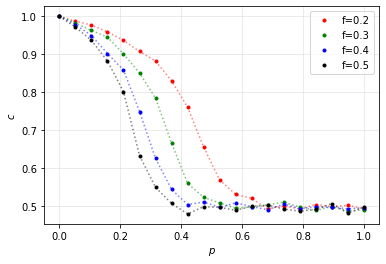

In [36]:
colors = ['r', 'g', 'b', 'k']
domain = np.linspace(0, 1, 20)
for (f, results), color in zip(f_results.items(), colors):
    plt.plot(domain ,results, '.', label=f'f={f}', color=color)
    plt.plot(domain ,results, ':', alpha=0.5, color=color)
plt.legend()
plt.grid(alpha=0.3)
plt.xlabel(r'$p$')
plt.ylabel(r'$c$')
plt.show()

In [25]:
def ba_simulation(n, q=4, f=0.5, n_mc=100, n_iterations=10):
    """Run the simulation on Barabasi-Albert graph, where each graph is updated `n_iterations`
    times and the results are averaged using Monte Carlo method with `n_mc` iterations.
    """
    ps = np.linspace(0, 1, 20)
    results = []
    for p in tqdm(ps):
        partial_results = []
        for i in range(n_mc):
            graph = barabasi_albert_with_state(n, m=4)
            for _ in range(n_iterations):
                graph = update(graph, q, p, f)
            partial_results.append(true_fraction(graph))
        partial_results = np.array(partial_results)  # Cast to numpy array.
        results.append(partial_results.mean())
    return np.array(results)

Simulations for Barabasi-Albert.

In [32]:
f_results_ba = {
    0.2: [], 
    0.3: [], 
    0.4: [], 
    0.5: []
}

for f in f_results_ba.keys():
    f_results_ba[f] = ba_simulation(100, f=1-f, n_mc=50, n_iterations=50)

Results for Barabasi-Albert.

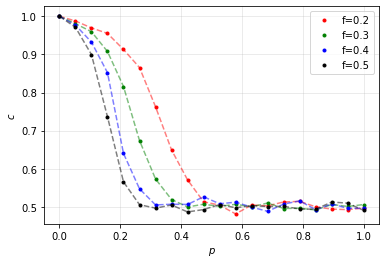

In [33]:
colors = ['r', 'g', 'b', 'k']
domain = np.linspace(0, 1, 20) 
for (f, results), color in zip(f_results_ba.items(), colors):
    plt.plot(domain ,results, '.', label=f'f={f}', color=color)
    plt.plot(domain ,results, '--', alpha=0.5, color=color)
plt.legend()
plt.grid(alpha=0.3)
plt.xlabel(r'$p$')
plt.ylabel(r'$c$')
plt.show()